# 线性回归

我们来分析一个案例，关于美国某个城市人口与其城市收入的问题，根据其提供的样本绘制散点图如下

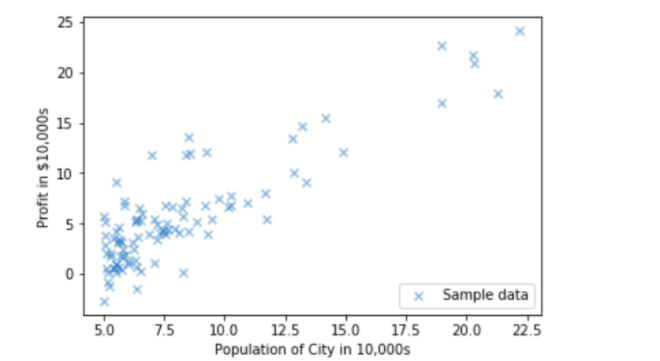

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv('cityprofit.csv')
# 提取csv文件

X = dataset.iloc[:, 0:1].values   # 所有行，第0列

Y = dataset.iloc[:, 1].values           # 所有行，第1列


In [14]:
# 数据集的拆分

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=1/4, random_state =0)



In [15]:
# 线性回归模型

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

"""
    LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):线性回归
        parameters：
            fit_intercept: 是否计算截距
            normalize:     是否规范化
            copy_x:        是否复制x
        Attributes:属性
            coef_:         系数 （线性回归方程的斜率）
            intercept_:    截距
        Methods:方法
            fit(X, y, sample_weight=None):   拟合 （这个很强大）
            get_params(deep=True):           得到参数,如果deep为True则得到这个estimator 的子对象返回参数名和值的映射
            set_params(**params):            设置参数
            predict(X):                      预测
            score(X, y, sample_weight=None): 预测的准确度。X：测试样本；y：X的真实结果；sample_w
            weight:                           权重
"""

regressor = regressor.fit(X_train, Y_train)

# fit要求x是一个二维数组 
# [:, 0 ]会自动处理为一维数组，所以要写为 [: , 0:1], [:, :1]

Y_pred = regressor.predict(X_test)


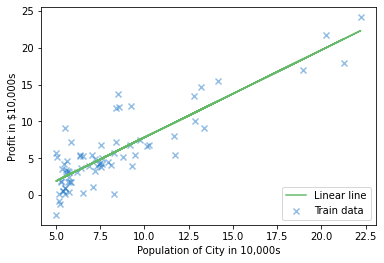

In [19]:
# 可视化

plt.scatter( X_train, Y_train, color = '#2177C7',marker='x', alpha=0.48)
plt.plot(X_train, regressor.predict(X_train),  color ='#66BB6A')
plt.legend(labels=["Linear line","Train data"],loc="lower right")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()


In [20]:
print("训练后结果")

print("斜率：%.2f"%float(regressor.coef_))
print("截距：%.2f"%float(regressor.intercept_))

训练后结果
斜率：1.19
截距：-4.05


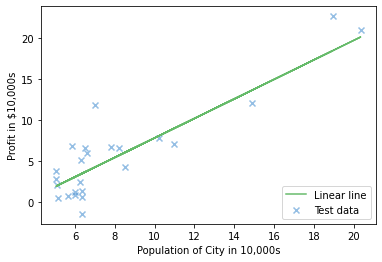

In [21]:
# 测试集的效果

plt.scatter(X_test , Y_test, color = '#2177C7',marker='x',alpha=0.48)
plt.plot(X_test , regressor.predict(X_test), color ='#66BB6A')
plt.legend(labels=["Linear line","Test data"],loc="lower right");
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# KNN 算法

sepal_length 最大值：7.9
sepal_length 最小值：4.3
sepal_length 平均值：5.8
-------------------------------------
sepal_width 最大值：4.4
sepal_width 最小值：2.0
sepal_width 平均值：3.1
-------------------------------------
cm [[13  0  0]
 [ 0  9  7]
 [ 0  2  7]]


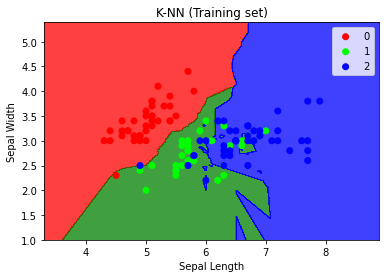

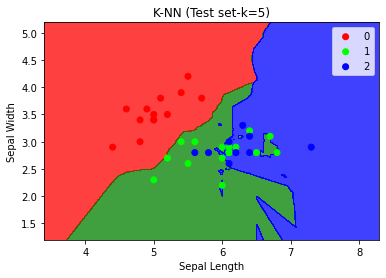

In [14]:
# K近邻算法

# 导入相关库文件

import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
from sklearn import neighbors, datasets
    # 导入了很多经典的数据集



# 导入数据集，数据集sklearn自带，X与y一一对应
dataset = datasets.load_iris()
    # 获取鸢尾花前两列花萼长度和花萼宽度（sepal_length、sepal_width）数据作为X
    # 自带的数据集，load就可以直接加载
    # pycharm下可以go to下载


X = dataset.data[:, :2]
# 获取鸢尾花种类作为Y
# 2表示Iris-virginica，1表示Iris-versicolor，0表示Iris-setosa

y = dataset.target
# 有3种类别的花，获取类别

# 这里没有进行特征缩放，是因为X属于一个都在一个较小的区间，所以无需进行特征缩放(已经达到特征缩放后的要求，观察数据很重要)

attributes_dict = {0:"sepal_length",1:"sepal_width"}
for attribute in attributes_dict:
    print("{} 最大值：{}".format(attributes_dict[attribute], np.max(X[:,attribute])))
    print("{} 最小值：{}".format(attributes_dict[attribute], np.min(X[:,attribute])))
    # round 函数将float数据格式化小数点后一位
    print("{} 平均值：{}".format(attributes_dict[attribute], round(np.average(X[:, attribute]),1)))
    print("-------------------------------------")

# 划分数据为训练集和测试集
from sklearn.model_selection import train_test_split
"""
    train_test_split(train_data,train_target,test_size=0.4, random_state=0,stratify=y_train)
    Parameters：
        train_data：所要划分的样本特征集
        train_target：所要划分的样本结果
        test_size：样本占比，如果是整数的话就是样本的数量
        random_state：是随机数的种子。
        随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。
        比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。
        但填0或不填，每次都会不一样。
"""
# train_test_split返回四个参数
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# 使用训练集训练KNN
from sklearn.neighbors import KNeighborsClassifier
# 调用KNN分类器
'''
        class KNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                                    SupervisedIntegerMixin, ClassifierMixin):
            Parameters:
                n_neighbors:   默认邻居的数量
                weights：      权重
                    可选参数
                    uniform:    统一的权重. 在每一个邻居区域里的点的权重都是一样的。
                    distance:   权重点等于他们距离的倒数。使用此函数，更近的邻居对于所预测的点的影响更大
                    [callable]: 一个用户自定义的方法，此方法接收一个距离的数组，然后返回一个相同形状并且包含权重的数组。
                algorithm：    采用的算法
                    可选参数
                     ball_tree: 使用算法 BallTree
                     kd_tree:   使用算法 KDTree
                     brute:     使用暴力搜索
                     auto:      会基于传入fit方法的内容，选择最合适的算法。     
                p:              距离度量的类型
                metric：        树的距离矩阵
                metric_params： 矩阵参数
                n_jobs：        用于搜索邻居，可并行运行的任务数量
'''
# p=2表示选取欧式距离
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        # 闵克斯级举例，p=2就是欧氏距离
        # 传入参数后，就实例化对象了
classifier.fit(X_train, y_train)
        # 保存了数据

# 预测测试集结果
y_pred = classifier.predict(X_test)
    # 得到了模型的预测结果

# 创建混淆矩阵
from sklearn.metrics import confusion_matrix
    # 导入混淆矩阵，行是实际的，列是预测的
"""
    def confusion_matrix(y_true, y_pred, labels=None, sample_weight=None):
        # 要传入真实标签 和 模型预测的结果
        Parameters：
             y_true:       样本真实分类结果
             y_pred:       样本预测分类结果 
             labels:       给出的类别
             sample_weigh: 样本权重

"""
# 所有正确预测的结果都在对角线上，非对角线上的值为预测错误数量
cm = confusion_matrix(y_test, y_pred)
    # 真实结果是y_test，预测结果是y_pred
    
print('cm',cm)
    # 这就是一个混淆矩阵

# 可视化训练集结果
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# meshgrid函数用两个坐标轴上的点在平面上画网格。
# X1，X2为坐标矩阵，用来画网格
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# 绘制二维等高线
# 在网格的基础上添加高度值
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    # 绘制散点图
    # 自matplotlib 3.0.3 之后，scatter的c参数接收的数据类型为numpy的二维数组
    # 这里的color_list，有三种类别的点，采用红、绿、蓝、三种颜色辨识
    # 数组内容为rgb数组
    color_list = [[[1,0,0],[0,1,0],[0,0,1]][i]]
    # 使用掩码方法获取所有类别为0、1、2的数据点个数
    count = np.sum((y_set == j)==True)
    # 通过掩码的方式从X_set中获取当类别为0、1、2时的x坐标和y坐标
    '''
        plt.scatter(x, y, c, marker, cmap, 
                                alpha, linewidths, edgecolors):
            Parameters:
                x, y:   数据的坐标
                c:      颜色，颜色序列
                marker: 绘制数据点的形状，默认是点
                cmap：  atplotlib.colors.Colormap 内置的颜色序列
                alpha:  绘制数据点的透明度范围是[0-1] 0到1表示完全透明到完全不透明
                linewidths:   数据点形状的边框粗细
                edgecolors :  数据点形状的边框颜色
    '''
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
            c = color_list*count, label = j)

plt.title('K-NN (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()



# 可视化测试集结果
from matplotlib.colors import ListedColormap
# meshgrid函数用两个坐标轴上的点在平面上画网格。
# X1，X2为坐标矩阵，用来画网格
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# 绘制二维等高线
# 在网格的基础上添加高度值
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    # 绘制散点图
    # 自matplotlib 3.0.3 之后，scatter的c参数接收的数据类型为numpy的二维数组
    # 这里的color_list，有三种类别的点，采用红、绿、蓝、三种颜色辨识
    # 数组内容为rgb数组
    color_list = [[[1,0,0],[0,1,0],[0,0,1]][i]]
    # 使用掩码方法获取所有类别为0、1、2的数据点个数
    count = np.sum((y_set == j)==True)
    # 通过掩码的方式从X_set中获取当类别为0、1、2时的x坐标和y坐标
    '''
        plt.scatter(x, y, c, marker, cmap, 
                                alpha, linewidths, edgecolors):
            Parameters:
                x, y:   数据的坐标
                c:      颜色，颜色序列
                marker: 绘制数据点的形状，默认是点
                cmap：  atplotlib.colors.Colormap 内置的颜色序列
                alpha:  绘制数据点的透明度范围是[0-1] 0到1表示完全透明到完全不透明
                linewidths:   数据点形状的边框粗细
                edgecolors :  数据点形状的边框颜色
    '''
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = color_list*count, label = j)
plt.title('K-NN (Test set-k=5)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# 朴素贝叶斯

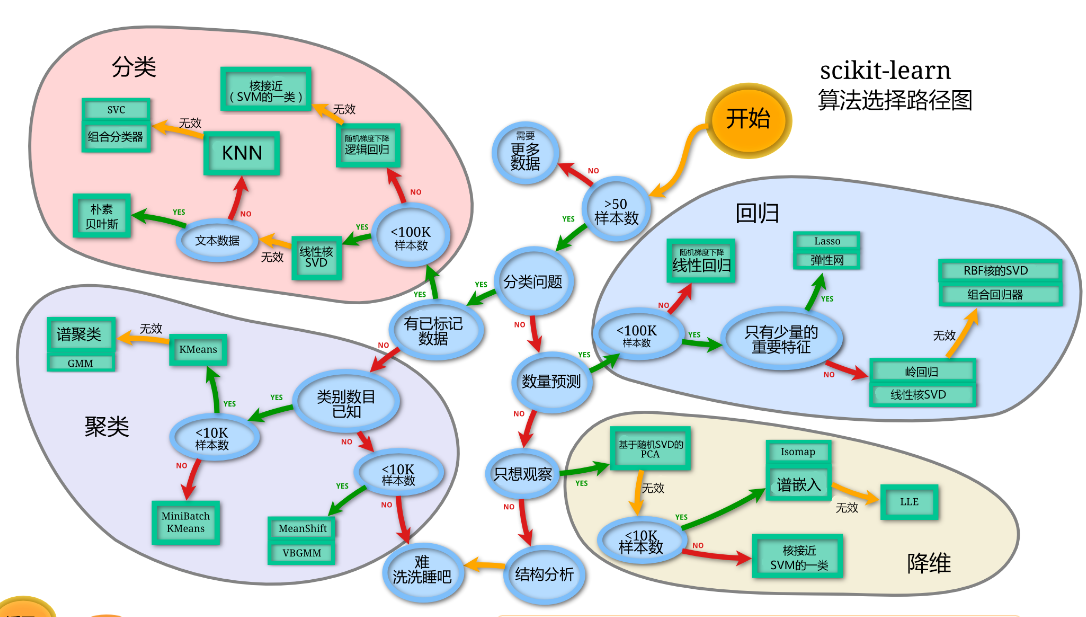

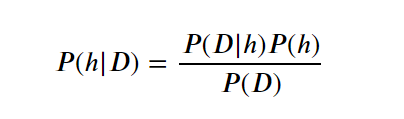

该实验的数据集是MostPopular Data Sets（hits since 2007）中的wine数据集，这是是对在意大利同一地区生产的三种不同品种的酒，做大量分析所得出的数据。这些数据包括了三种酒中13种不同成分的数量。(由于专业性较强，暂不对特征进行翻译)

In [30]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [35]:
wine = datasets.load_wine()     # 加载酒的数据集
print ("Features: ",wine.feature_names)
print ("Labels: ",wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [38]:
X=wine.data
X.shape


(178, 13)

In [40]:
print(X[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [41]:
y=wine.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [42]:
# 进行散点图的绘制

def draw(X_set, y_set, set_type):
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#FFAAAA', '#AAAAFF','#AAFFAA'))(i), label = j)
    plt.title('Wine Classification( '+set_type+' )')
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.legend()
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


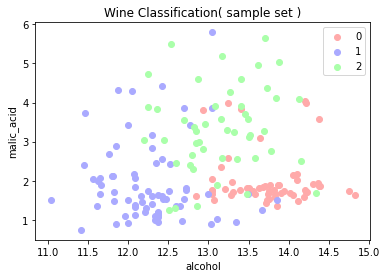

In [43]:
draw(X,y,'sample set')

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state =109)

In [27]:
# 训练模型

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()


"""
class GaussianNB(BaseNB):
    Parameters
        priors: 类的先验概率
    Attributes属性：
        class_prior_: 每个类别的概率
        class_count_：每个类别包含的样本数量
        theta_ ：每个类别上每个特征的均值
        sigma_ ：每个类别上每个特征的标准差
    Meathod方法：
        fit(X,y) : 训练模型。
        partial_fit(X,y) : 追加训练模型，该方法主要用于大规模数据集的训练，此时大规模数据集被分成多个小数据集然后分别训练。
        predict(X) : 用模型预测。
        predict_log_proba(X) : 各个类别的概率值的对数值。
        predict_proba(X) : X预测为各个类别的概率值。
        score(X,y) : 预测的准确率(accuracy)。

"""

# 训练模型
gnb.fit(X_train, y_train)

# 预测模型
y_pred = gnb.predict(X_test)ss

In [28]:
# 误差分析

print(y_test)
print(y_pred)

[0 0 1 2 0 1 0 1 1 0 1 1 2 2 0 1 1 0 0 1 2 1 0 2 0 0 1 2 0 1 2 1 1 0 1 1 0
 2 2 0 2 0 0 0 0 2 2 0 1 1 2 1 0 2]
[0 0 1 2 0 1 0 0 1 0 2 2 2 2 0 1 1 0 0 1 2 1 0 2 0 0 1 2 0 1 2 1 1 0 1 1 0
 2 2 0 2 1 0 0 0 2 2 0 1 1 2 0 0 2]


In [45]:
# 计算错误率 

mistake = np.sum(y_test != y_pred)

total = y_test.shape[0]

print("测试集样本总数：%d"%total)
print("错误分类样本总数：%d"%mistake)
print("正确分类率：%.2f"%float(1-mistake/total))

测试集样本总数：54
错误分类样本总数：5
正确分类率：0.91


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


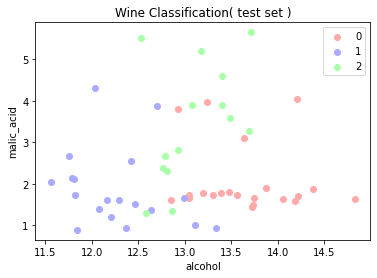

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


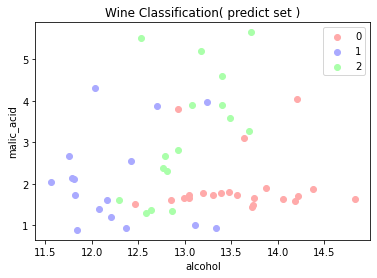

In [46]:
draw(X_test,y_test,'test set')
draw(X_test,y_pred,'predict set')

#  神经网络

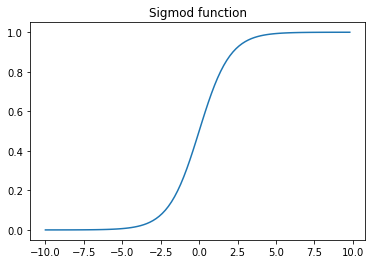

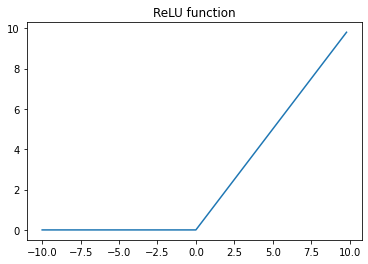

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


def sigmoid(x):
    # 直接返回sigmoid函数
    return 1. / (1. + np.exp(-x))

def plot_sigmoid():
    # param:起点，终点，间距
    x = np.arange(-10, 10, 0.2)
    y = sigmoid(x)
    plt.title("Sigmod function")
    plt.plot(x, y)
    plt.show()
    
def relu(x):
    s = np.where(x < 0, 0, x)
    return s

def plot_relu():
    # param:起点，终点，间距
    x = np.arange(-10, 10, 0.2)
    y = relu(x)
    plt.title("ReLU function")
    plt.plot(x, y)
    plt.show()

#绘制sigmod函数
plot_sigmoid()
#绘制ReLU函数
plot_relu()


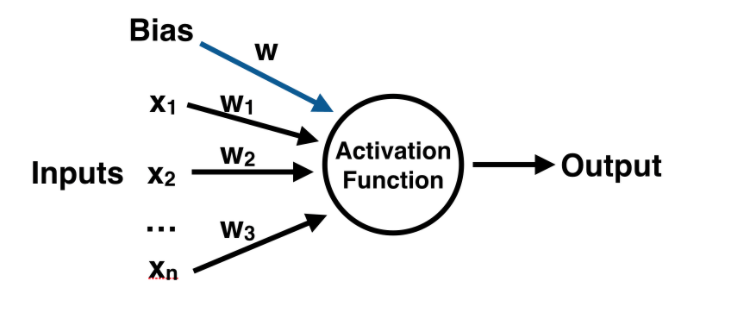

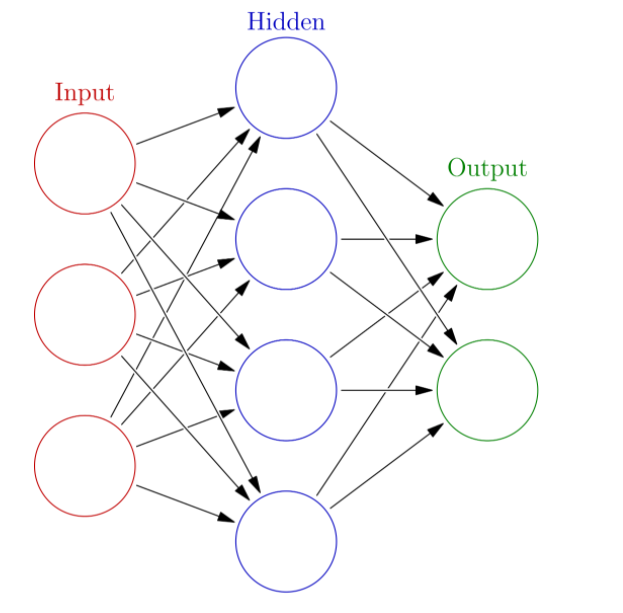

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
dataset = datasets.load_wine()
data = dataset.data
# 为了方便演示将数据和标签一起封装成DataFrame
X = pd.DataFrame(data,columns=dataset.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
"""
count 数量  mean 平均值  std 标准差   min 最小值
25% 第一四分位数,等于该样本中所有数值由小到大排列后第25%的数字。
50% 中位数
75% 同上类似
max 最大值
"""
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [4]:
X.shape

(178, 13)

In [5]:
y = dataset.target
print(y)
print(np.unique(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 1 2]


In [6]:
# 数据集的拆分

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    # 类创建实例

scaler.fit(X_train)          # 算一下标准化的参数：均值、方差等

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [16]:
from sklearn.neural_network import MLPClassifier

"""
    MLPClassifier(BaseMultilayerPerceptron, ClassifierMixin):
        Parameters:
            hidden_layer_sizes : 第i个元素表示第i个隐藏层中的神经元数量。 1 2 5
            activation : 激活函数
            solver : 权重优化的求解器
            alpha : 惩罚（正则化项）参数。
            batch_size： minibatch的大小
            learning_rate：权重更新（学习率）
            learning_rate_init：初始的学习率
            power_t：反缩放学习率的指数。
            max_iter： 最大迭代次数
            shuffle： 每次迭代中对样本进行重洗
            random_state： 随机种子
            tol： 优化的阈值
            verbose：是否打印到stdout。
            warm_start：重用上一次调用的解决方案以适合初始化
            momentum： 梯度下降更新的动量
            nesterovs_momentum：是否使用Nesterov动量
            early_stopping ：当评价没有改善，是否提前终止训练
            validation_fraction：将训练数据留一部分当作早期终止训练的验证集
            beta_1：一阶矩向量的指数衰减率
            beta_2：二阶矩向量的指数衰减率
            epsilon：adam稳定性的价值
        Attributes：
            classes_：每个输出的类标签。
            loss_：使用损失函数计算的当前损失。
            coefs_：列表中的第i个元素表示对应于层i的权重矩阵。
            intercepts_：列表中的第i个元素表示对应于层i+1的偏置。
            n_iter_：迭代次数。
            n_layers_：层数。
            n_outputs_： 输出的个数。
            out_activation_：输出激活函数的名称。
            
"""


mlp = MLPClassifier(hidden_layer_sizes=(13,15,13,3),max_iter=500) 

mlp.fit(X_train, y_train)

C:\Users\hz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(13, 15, 13, 3), max_iter=500)

In [17]:
y_pred = mlp.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 19  0]
 [ 0  1 10]]


In [19]:
mistake = np.sum(y_test != y_pred)

total = y_test.shape[0]

print("测试集样本总数：%d"%total)
print("错误分类样本总数：%d"%mistake)
print("正确分类率：%.2f"%float(1-mistake/total))

测试集样本总数：45
错误分类样本总数：1
正确分类率：0.98


# 支持向量机 SVM

    
- 当训练样本线性可分时，通过硬间隔最大化，学习一个线性可分支持向量机；


- 当训练样本近似线性可分时，通过软间隔最大化，学习一个线性支持向量机；


- 当训练样本线性不可分时，通过核技巧和软间隔最大化，学习一个非线性支持向量机；

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


In [22]:
# 数据的创造
X, y = make_blobs( n_samples = 80, centers = 2, random_state = 6)

"""
    def make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0,
               center_box=(-10.0, 10.0), shuffle=True, random_state=None):
        Parameters:
            n_samples：    待生成的样本的总数
            n_features：   是每个样本的特征数
            centers：      表示类别数
            cluster_std：  每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]。
            center_box：   中心确定之后的数据边界
            shuffle ：     打乱样本，默认值是True
            random_state： 随机生成器的种子
        
"""

print(X[ :5, :])

print(y[:5])

[[ 9.07568367 -4.21790533]
 [ 8.28348842 -4.11856092]
 [ 5.88397542 -8.37284513]
 [ 5.94709536 -9.05353781]
 [ 8.49142837 -2.54974889]]
[0 0 1 1 0]


In [24]:
# 模型训练

from sklearn import svm
clf = svm.SVC(kernel= 'linear', C=1000)

"""
svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
            probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
            max_iter=-1, decision_function_shape='ovr', random_state=None)
        Parameter:
            C：      正则的惩罚项
            kernel： 算法中采用的核函数类型
                - linear：     线性核函数
                - poly：       多项式核函数
                - rbf：        径向核函数/高斯核
                - sigmod：     sigmod核函数
                - precomputed：核矩阵
            degree：  多项式poly函数的维度
            gamma：   核函数常数项
            coef0：   核函数中的独立项
            probability： 是否启用概率估计
            shrinking：   是否启用启发式收缩方式
            tol：         停止训练的误差值
            cache_size：  核函数cache缓存大小
            class_weight：类别的权重
            verbose：     是否启用详细输出
            max_iter：    最大迭代次数
            decision_function_shape： 原始的SVM只适用于二分类问题，如果要将其扩展到多类分类，就要采取一定的融合策略
            random_state： 随机种子
        Attributes：
            support_：            各类的支持向量在训练样本中的索引
            n_support_：          各类各有多少个支持向量
            support_vectors_：    各类所有的支持向量
            dual_coef_：          对偶系数，支持向量在决策函数中的系数
            coef_：        该参数仅在线性核时才有效，指的是每一个属性被分配的权值。
            intercept_：          决策函数中的常数项bias。和coef_共同构成决策函数的参数值。

"""

clf.fit(X, y)

SVC(C=1000, kernel='linear')

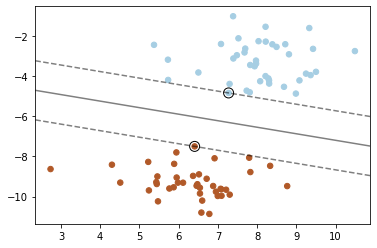

In [25]:
# 绘制决策平面、支持向量

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired )
# s表示形状大小

# 绘制决策函数
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 为评估模型创建网格
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 绘制决策边界,[-1, 0, 1]分别对应wx+b=k的k值
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


# 绘制支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


plt.show()
